<a href="https://colab.research.google.com/github/ExCaLBBR/ExCaLBBR_Projects/blob/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/code/RBD_IAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Import libraries
import pandas as pd #for dealing with csv import
import os # for joining paths and filenames sensibly
import numpy as np #for the population std
import glob # for finding csv data files
import platform # paths use different dividers on linux vs windows, so we need to test for this
import string
from scipy.stats import sem
import matplotlib.pyplot as plt

In [2]:
#@title Define Utility functions
#Compute adjusted mean
def adjustedmean(RTs,corrs,penalty):
    n=len(corrs) #trials
    n_errors=int(n-sum(corrs)) #errors
    # print("Number of correctness: ", int(sum(corrs)))
    # print("Number of errors: ", n_errors)
    cor_RTs=np.array(corrs)*RTs #sum of correct RTs
    cor_mean=sum(cor_RTs)/sum(corrs)

    #mean with errors replaced with penalty value
    return cor_mean+(n_errors*penalty)/n


#Remove timed out trials
def exclude_slows(RTs,corrs,slowRT_limit):
    new_rt=[] #holding variables
    new_cr=[]
    for i in range(len(RTs)): #iterate over every item
        if RTs[i] < slowRT_limit: #if it isn't too fast, include RT and corr values
            new_rt.append(RTs[i])
            new_cr.append(corrs[i])

    return (new_rt, new_cr)

#Compute IAT bias rating
def iat_analyze(congr_rts_raw, congr_corr_raw, incon_rts_raw, incon_corr_raw, df_name):
    #1 discard subject if too many fast responses
    if sum(np.array(np.concatenate((np.array(congr_rts_raw), np.array(incon_rts_raw))))<fastRT_limit)>len(np.concatenate((np.array(congr_rts_raw), np.array(incon_rts_raw))))*fast_prop_limit:
        print ("excluding subject because too many fast responses")
    else:
        #2 Eliminate scores over 10,000 ms

        congr_rts,congr_corr=exclude_slows(congr_rts_raw,congr_corr_raw,slowRT_limit)
        incon_rts,incon_corr=exclude_slows(incon_rts_raw,incon_corr_raw,slowRT_limit)

        #3 Calculate pooled std
        #pooled_std=pooled.std(0) #n-1 std sample std
        #(Use N not N-1 because this is the whole sample).
        #numpy.std is population std
        pooled=congr_rts + incon_rts #all RTs from both blocks, correct and incorrect
        pooled_std=np.std(pooled)

        #4 Calculated adjusted means, including the penalty
        congr_adjmean=adjustedmean(congr_rts,congr_corr,penalty)
        incon_adjmean=adjustedmean(incon_rts,incon_corr,penalty)

        #5 Calculate the IAT, so that pro-stereotype RTs are a -ve score
        IAT=(congr_adjmean-incon_adjmean)/pooled_std

        simpleIAT=sum(congr_rts)/len(congr_rts)-sum(incon_rts)/len(incon_rts)

        return(IAT)
        print("IAT for " + df_name + " is : {:+.3f}".format(IAT))
        print("Mean difference (uncorrected) " + df_name + " is {:+.3f}".format(simpleIAT)+" seconds")

In [3]:
#@title Load data
IAT_C= pd.read_csv ('https://raw.githubusercontent.com/ExCaLBBR/ExCaLBBR_Projects/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/IAT_C.csv', header=0)
IAT_W = pd.read_csv ('https://raw.githubusercontent.com/ExCaLBBR/ExCaLBBR_Projects/main/RaciallyBiasedDecisions/RaciallyBiasedDecisions_APF/behavioral/data/IAT_W.csv', header=0)

In [4]:
#@title Specify thresholds
penalty=0.600 #penalty - in seconds - for incorrect responses
slowRT_limit=10000 #threshold at which slow RTs are discarded
fastRT_limit=300 #threshold which defines responses which are "too fast"
fast_prop_limit=0.1 # threshold proportion of "too fast" responses which defines exclusion of ppt


In [5]:
#@title Data subsetting and recoding

#Correct ID formatting
IAT_C['Participant Private ID'] = [int(sub) for sub in IAT_C['Participant Private ID']]
IAT_C['Participant Private ID'] = IAT_C['Participant Private ID'].astype(str)
IAT_W['Participant Private ID'] = [int(sub) for sub in IAT_W['Participant Private ID']]
IAT_W['Participant Private ID'] = IAT_W['Participant Private ID'].astype(str)


In [10]:
IAT_C

,Unnamed: 0,Participant Private ID,randomiser-745l,randomiser-hhua,Response,Absolute Reaction Time,Correct,Component Name,Spreadsheet: ImageLeft,Spreadsheet: ImageRight,Spreadsheet: TextLeft,Spreadsheet: TextRight,Spreadsheet: metadata,Spreadsheet: metadata2
0,0,9394743,NaN,Male_InOut,left,1081.602,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,NaN,NaN,practice_images,NaN
1,1,9394743,NaN,Male_InOut,left,840.726,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,NaN,NaN,practice_images,NaN
2,2,9394743,NaN,Male_InOut,left,1152.456,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,NaN,NaN,practice_images,NaN
3,3,9394743,NaN,Male_InOut,right,1142.308,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,NaN,NaN,practice_images,NaN
4,4,9394743,NaN,Male_InOut,right,870.461,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,NaN,NaN,practice_images,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19305,19305,9852999,Female_InOut,NaN,right,933.066,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,Weak,Strong,incongruent,incon_Str
19306,19306,9852999,Female_InOut,NaN,left,1130.716,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,Weak,Strong,incongruent,incon_Str
19307,19307,9852999,Female_InOut,NaN,right,760.654,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,Weak,Strong,incongruent,incon_Str
19308,19308,9852999,Female_InOut,NaN,left,1018.458,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,Weak,Strong,incongruent,incon_Str


In [6]:
#@title Filter participants who are too fast
#Find and remove participants who are too fast

# C Int/Str/Dis
C_ID = np.unique(IAT_C['Participant Private ID'])
remIndx = []
for p in C_ID:
  datpi = IAT_C.loc[IAT_C['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_congInt_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'cong_Int']
  datpi_incongInt_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'incon_Int']
  if sum(np.array(np.concatenate((np.array(datpi_congInt_rt), np.array(datpi_incongInt_rt))))<fastRT_limit)>len(np.concatenate((np.array(datpi_congInt_rt), np.array(datpi_incongInt_rt))))*fast_prop_limit:
    print ("Excluding subject", p, "for C Int because too many fast responses")
    remIndx.append(p)

for p in C_ID:
  datpi = IAT_C.loc[IAT_C['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_congStr_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'cong_Str']
  datpi_incongStr_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'incon_Str']
  if sum(np.array(np.concatenate((np.array(datpi_congStr_rt), np.array(datpi_incongStr_rt))))<fastRT_limit)>len(np.concatenate((np.array(datpi_congStr_rt), np.array(datpi_incongStr_rt))))*fast_prop_limit:
    print ("Excluding subject", p, "for C STR because too many fast responses")
    remIndx.append(p)

for p in C_ID:
  datpi = IAT_C.loc[IAT_C['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_congDis_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'cong_Dir']
  datpi_incongDis_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'incon_Dir']
  if sum(np.array(np.concatenate((np.array(datpi_congDis_rt), np.array(datpi_incongDis_rt))))<fastRT_limit)>len(np.concatenate((np.array(datpi_congDis_rt), np.array(datpi_incongDis_rt))))*fast_prop_limit:
    print ("Excluding subject", p, "for C Dir because too many fast responses")
    remIndx.append(p)

for p in np.unique(remIndx):
  IAT_C = IAT_C[IAT_C['Participant Private ID'] != p]

# W Int/Str/Dis
W_ID = np.unique(IAT_W['Participant Private ID'])
remIndx = []
for p in W_ID:
  datpi = IAT_W.loc[IAT_W['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_congInt_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'cong_Int']
  datpi_incongInt_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'incon_Int']
  if sum(np.array(np.concatenate((np.array(datpi_congInt_rt), np.array(datpi_incongInt_rt))))<fastRT_limit)>len(np.concatenate((np.array(datpi_congInt_rt), np.array(datpi_incongInt_rt))))*fast_prop_limit:
    print ("Excluding subject", p, "for W Int because too many fast responses")
    remIndx.append(p)

for p in W_ID:
  datpi = IAT_W.loc[IAT_W['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_congStr_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'cong_Str']
  datpi_incongStr_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'incon_Str']
  if sum(np.array(np.concatenate((np.array(datpi_congStr_rt), np.array(datpi_incongStr_rt))))<fastRT_limit)>len(np.concatenate((np.array(datpi_congStr_rt), np.array(datpi_incongStr_rt))))*fast_prop_limit:
    print ("Excluding subject", p, "for W STR because too many fast responses")
    remIndx.append(p)

for p in W_ID:
  datpi = IAT_W.loc[IAT_W['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_congDis_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'cong_Dir']
  datpi_incongDis_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'incon_Dir']
  if sum(np.array(np.concatenate((np.array(datpi_congDis_rt), np.array(datpi_incongDis_rt))))<fastRT_limit)>len(np.concatenate((np.array(datpi_congDis_rt), np.array(datpi_incongDis_rt))))*fast_prop_limit:
    print ("Excluding subject", p, "for W Dir because too many fast responses")
    remIndx.append(p)

for p in np.unique(remIndx):
  IAT_W = IAT_W[IAT_W['Participant Private ID'] != p]

Excluding subject 9394769 for C Int because too many fast responses
Excluding subject 9853067 for C Int because too many fast responses
Excluding subject 9394769 for C Dir because too many fast responses
Excluding subject 9362255 for W Int because too many fast responses
Excluding subject 9362325 for W Int because too many fast responses
Excluding subject 9362330 for W Int because too many fast responses
Excluding subject 9362347 for W Int because too many fast responses
Excluding subject 9362360 for W Int because too many fast responses
Excluding subject 9852775 for W Int because too many fast responses
Excluding subject 9852778 for W Int because too many fast responses
Excluding subject 9852779 for W Int because too many fast responses
Excluding subject 9852832 for W Int because too many fast responses
Excluding subject 9852840 for W Int because too many fast responses
Excluding subject 9852845 for W Int because too many fast responses
Excluding subject 9362255 for W STR because too 

In [11]:
IAT_W

,Unnamed: 0,Participant Private ID,randomiser-745l,randomiser-hhua,Response,Absolute Reaction Time,Correct,Component Name,Spreadsheet: ImageLeft,Spreadsheet: ImageRight,Spreadsheet: TextLeft,Spreadsheet: TextRight,Spreadsheet: metadata,Spreadsheet: metadata2
0,0,9362250,NaN,Male_InOut,left,4654.401000,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,NaN,NaN,practice_images,NaN
1,1,9362250,NaN,Male_InOut,left,679.955000,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,NaN,NaN,practice_images,NaN
2,2,9362250,NaN,Male_InOut,right,648.019000,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,NaN,NaN,practice_images,NaN
3,3,9362250,NaN,Male_InOut,left,612.042000,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,NaN,NaN,practice_images,NaN
4,4,9362250,NaN,Male_InOut,right,858.210000,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,NaN,NaN,practice_images,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17841,17841,9852794,NaN,Male_InOut_Swap,left,670.997000,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,Intelligence,Stupidity,incongruent,incon_Int
17842,17842,9852794,NaN,Male_InOut_Swap,left,715.642000,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,Intelligence,Stupidity,incongruent,incon_Int
17843,17843,9852794,NaN,Male_InOut_Swap,left,801.308999,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,Intelligence,Stupidity,incongruent,incon_Int
17844,17844,9852794,NaN,Male_InOut_Swap,right,738.302000,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,Intelligence,Stupidity,incongruent,incon_Int


In [12]:
  datpi = IAT_C.loc[IAT_C['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_congDis_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'cong_Dir']
  datpi_incongDis_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'incon_Dir']
  datpi_congDis_acc = datpi['Correct'].loc[datpi['Spreadsheet: metadata2']== 'cong_Dir']
  datpi_incongDis_acc = datpi['Correct'].loc[datpi['Spreadsheet: metadata2']== 'incon_Dir']

In [14]:
IAT_C


,Unnamed: 0,Participant Private ID,randomiser-745l,randomiser-hhua,Response,Absolute Reaction Time,Correct,Component Name,Spreadsheet: ImageLeft,Spreadsheet: ImageRight,Spreadsheet: TextLeft,Spreadsheet: TextRight,Spreadsheet: metadata,Spreadsheet: metadata2
0,0,9394743,NaN,Male_InOut,left,1081.602,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,NaN,NaN,practice_images,NaN
1,1,9394743,NaN,Male_InOut,left,840.726,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,NaN,NaN,practice_images,NaN
2,2,9394743,NaN,Male_InOut,left,1152.456,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,NaN,NaN,practice_images,NaN
3,3,9394743,NaN,Male_InOut,right,1142.308,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,NaN,NaN,practice_images,NaN
4,4,9394743,NaN,Male_InOut,right,870.461,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,NaN,NaN,practice_images,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19305,19305,9852999,Female_InOut,NaN,right,933.066,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,Weak,Strong,incongruent,incon_Str
19306,19306,9852999,Female_InOut,NaN,left,1130.716,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,Weak,Strong,incongruent,incon_Str
19307,19307,9852999,Female_InOut,NaN,right,760.654,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,Weak,Strong,incongruent,incon_Str
19308,19308,9852999,Female_InOut,NaN,left,1018.458,1.0,Keyboard Response,af00009_fg.png,wf00009_fg.png,Weak,Strong,incongruent,incon_Str


In [15]:
np.mean(datpi_congDis_rt)

nan

In [ ]:
np.mean(datpi_incongDis_rt)

1104.4167500123501

In [18]:
C_IAT_Disgust_simple

[-1.2092143265814457,
 22.647571425157366,
 -356.80849999064424,
 63.41057142389036,
 155.45357142857813,
 -3.872178571426616,
 11.637964286716624,
 179.08878571258435,
 -9.190892860546569,
 41.13053571641126,
 -229.9968571360389,
 -145.07475000002057,
 -379.5363214285567,
 20.292142857568706,
 909.4648214294867,
 -10.682107134343823,
 -77.45700001106945,
 -20.57142857142867,
 -54.84385714414907,
 -31.275357143396377,
 195.55439285712782,
 68.80928571428274,
 1.2698214238874925,
 102.8910000025644,
 -3.1981785637680105,
 102.44082142857019,
 -83.70453571427151,
 47.45428571428579,
 -55.99539286226252,
 330.6211071581878,
 -40.58971428826453,
 63.056428570466664,
 152.3214285714306,
 -110.76746428635045,
 -160.2119285767501,
 -149.71428571428578,
 108.14032142793121,
 116.91917857094916,
 85.41042857077264,
 -32.447142894611034,
 52.817749998316,
 46.848535715984895,
 111.31628572110333,
 116.29846429166446,
 610.1251071351975,
 5.370928547586232,
 -705.8128571428553,
 -10.6312500119258

In [17]:
#@title Compute participant-wise IAT bias

# Chinese Participant Intel
C_ID = np.unique(IAT_C['Participant Private ID'])
C_IAT_INT = []
C_IAT_INT_simple = []
for p in C_ID:
  datpi = IAT_C.loc[IAT_C['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_congInt_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'cong_Int']
  datpi_incongInt_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'incon_Int']
  datpi_congInt_acc = datpi['Correct'].loc[datpi['Spreadsheet: metadata2']== 'cong_Int']
  datpi_incongInt_acc = datpi['Correct'].loc[datpi['Spreadsheet: metadata2']== 'incon_Int']

  #reset indeces for function
  datpi_congInt_rt = datpi_congInt_rt.reset_index(drop=True); datpi_incongInt_rt = datpi_incongInt_rt.reset_index(drop=True); datpi_congInt_acc = datpi_congInt_acc.reset_index(drop=True); datpi_incongInt_acc = datpi_incongInt_acc.reset_index(drop=True)

  iatSimple = np.mean(datpi_congInt_rt) - np.mean(datpi_incongInt_rt)
  iatBias = iat_analyze(datpi_congInt_rt, datpi_congInt_acc, datpi_incongInt_rt, datpi_incongInt_acc, "C Int")
  C_IAT_INT.append(iatBias)
  C_IAT_INT_simple.append(iatSimple)

# Chinese Participant Strength
C_IAT_STR = []
C_IAT_STR_simple = []
for p in C_ID:
  datpi = IAT_C.loc[IAT_C['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_congStr_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'cong_Str']
  datpi_incongStr_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'incon_Str']
  datpi_congStr_acc = datpi['Correct'].loc[datpi['Spreadsheet: metadata2']== 'cong_Str']
  datpi_incongStr_acc = datpi['Correct'].loc[datpi['Spreadsheet: metadata2']== 'incon_Str']

  #reset indeces for function
  datpi_congStr_rt = datpi_congStr_rt.reset_index(drop=True); datpi_incongStr_rt = datpi_incongStr_rt.reset_index(drop=True); datpi_congStr_acc = datpi_congStr_acc.reset_index(drop=True); datpi_incongStr_acc = datpi_incongStr_acc.reset_index(drop=True)

  iatSimple = np.mean(datpi_congStr_rt) - np.mean(datpi_incongStr_rt)
  iatBias = iat_analyze(datpi_congStr_rt, datpi_congStr_acc, datpi_incongStr_rt, datpi_incongStr_acc, "C Str")
  C_IAT_STR.append(iatBias)
  C_IAT_STR_simple.append(iatSimple)

# Chinese Participant Disgust
C_IAT_Disgust = []
C_IAT_Disgust_simple = []
for p in C_ID:
  datpi = IAT_C.loc[IAT_C['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_congDis_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'cong_Dir']
  datpi_incongDis_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'incon_Dir']
  datpi_congDis_acc = datpi['Correct'].loc[datpi['Spreadsheet: metadata2']== 'cong_Dir']
  datpi_incongDis_acc = datpi['Correct'].loc[datpi['Spreadsheet: metadata2']== 'incon_Dir']

  #reset indeces for function
  datpi_congDis_rt = datpi_congDis_rt.reset_index(drop=True); datpi_incongDis_rt = datpi_incongDis_rt.reset_index(drop=True); datpi_congDis_acc = datpi_congDis_acc.reset_index(drop=True); datpi_incongDis_acc = datpi_incongDis_acc.reset_index(drop=True)

  iatSimple = np.mean(datpi_congDis_rt) - np.mean(datpi_incongDis_rt)
  iatBias = iat_analyze(datpi_congDis_rt, datpi_congDis_acc, datpi_congDis_rt, datpi_incongDis_acc, "C Disgust")
  C_IAT_Disgust.append(iatBias)
  C_IAT_Disgust_simple.append(iatSimple)



# White Participant Intel
W_ID = np.unique(IAT_W['Participant Private ID'])
W_IAT_INT = []
W_IAT_INT_simple = []
for p in W_ID:
  datpi = IAT_W.loc[IAT_W['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_congInt_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'cong_Int']
  datpi_incongInt_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'incon_Int']
  datpi_congInt_acc = datpi['Correct'].loc[datpi['Spreadsheet: metadata2']== 'cong_Int']
  datpi_incongInt_acc = datpi['Correct'].loc[datpi['Spreadsheet: metadata2']== 'incon_Int']

  #reset indeces for function
  datpi_congInt_rt = datpi_congInt_rt.reset_index(drop=True); datpi_incongInt_rt = datpi_incongInt_rt.reset_index(drop=True); datpi_congInt_acc = datpi_congInt_acc.reset_index(drop=True); datpi_incongInt_acc = datpi_incongInt_acc.reset_index(drop=True)

  iatSimple = np.mean(datpi_congInt_rt) - np.mean(datpi_incongInt_rt)
  iatBias = iat_analyze(datpi_congInt_rt, datpi_congInt_acc, datpi_incongInt_rt, datpi_incongInt_acc, "C Int")
  W_IAT_INT.append(iatBias)
  W_IAT_INT_simple.append(iatSimple)

# White Participant Strength
W_IAT_STR = []
W_IAT_STR_simple = []
for p in W_ID:
  datpi = IAT_W.loc[IAT_W['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_congStr_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'cong_Str']
  datpi_incongStr_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'incon_Str']
  datpi_congStr_acc = datpi['Correct'].loc[datpi['Spreadsheet: metadata2']== 'cong_Str']
  datpi_incongStr_acc = datpi['Correct'].loc[datpi['Spreadsheet: metadata2']== 'incon_Str']

  #reset indeces for function
  datpi_congStr_rt = datpi_congStr_rt.reset_index(drop=True); datpi_incongStr_rt = datpi_incongStr_rt.reset_index(drop=True); datpi_congStr_acc = datpi_congStr_acc.reset_index(drop=True); datpi_incongStr_acc = datpi_incongStr_acc.reset_index(drop=True)

  iatSimple = np.mean(datpi_congStr_rt) - np.mean(datpi_incongStr_rt)
  iatBias = iat_analyze(datpi_congStr_rt, datpi_congStr_acc, datpi_incongStr_rt, datpi_incongStr_acc, "C Str")
  W_IAT_STR.append(iatBias)
  W_IAT_STR_simple.append(iatSimple)

# White Participant Disgust
W_IAT_Disgust = []
W_IAT_Disgust_simple = []
for p in W_ID:
  datpi = IAT_W.loc[IAT_W['Participant Private ID'] == p] #get index for all trials with participant p
  datpi_congDis_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'cong_Dir']
  datpi_incongDis_rt = datpi['Absolute Reaction Time'].loc[datpi['Spreadsheet: metadata2']== 'incon_Dir']
  datpi_congDis_acc = datpi['Correct'].loc[datpi['Spreadsheet: metadata2']== 'cong_Dir']
  datpi_incongDis_acc = datpi['Correct'].loc[datpi['Spreadsheet: metadata2']== 'incon_Dir']

  #reset indeces for function
  datpi_congDis_rt = datpi_congDis_rt.reset_index(drop=True); datpi_incongDis_rt = datpi_incongDis_rt.reset_index(drop=True); datpi_congDis_acc = datpi_congDis_acc.reset_index(drop=True); datpi_incongDis_acc = datpi_incongDis_acc.reset_index(drop=True)

  iatSimple = np.mean(datpi_congDis_rt) - np.mean(datpi_incongDis_rt)
  iatBias = iat_analyze(datpi_congDis_rt, datpi_congDis_acc, datpi_incongDis_rt, datpi_incongDis_acc, "C Disgust")
  W_IAT_Disgust.append(iatBias)
  W_IAT_Disgust_simple.append(iatSimple)

In [19]:
C_IAT_Disgust_simple

[-1.2092143265814457,
 22.647571425157366,
 -356.80849999064424,
 63.41057142389036,
 155.45357142857813,
 -3.872178571426616,
 11.637964286716624,
 179.08878571258435,
 -9.190892860546569,
 41.13053571641126,
 -229.9968571360389,
 -145.07475000002057,
 -379.5363214285567,
 20.292142857568706,
 909.4648214294867,
 -10.682107134343823,
 -77.45700001106945,
 -20.57142857142867,
 -54.84385714414907,
 -31.275357143396377,
 195.55439285712782,
 68.80928571428274,
 1.2698214238874925,
 102.8910000025644,
 -3.1981785637680105,
 102.44082142857019,
 -83.70453571427151,
 47.45428571428579,
 -55.99539286226252,
 330.6211071581878,
 -40.58971428826453,
 63.056428570466664,
 152.3214285714306,
 -110.76746428635045,
 -160.2119285767501,
 -149.71428571428578,
 108.14032142793121,
 116.91917857094916,
 85.41042857077264,
 -32.447142894611034,
 52.817749998316,
 46.848535715984895,
 111.31628572110333,
 116.29846429166446,
 610.1251071351975,
 5.370928547586232,
 -705.8128571428553,
 -10.6312500119258

(array([ 5.,  1.,  2.,  7., 15., 22.,  8.,  4.,  1.,  3.]),
 array([-0.13909258, -0.11305952, -0.08702646, -0.06099341, -0.03496035,
        -0.00892729,  0.01710576,  0.04313882,  0.06917187,  0.09520493,
         0.12123799]),
 <BarContainer object of 10 artists>)

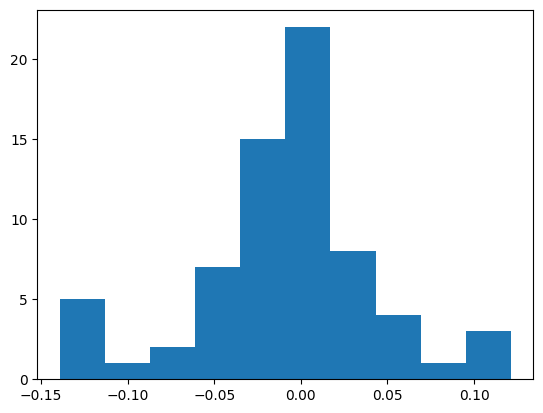

In [28]:
plt.hist(C_IAT_Disgust)

In [20]:
#@title Participant-wise analysis of IAT bias by Stereotype category

#Chinese participant Stereotype endorsement
C_IAT_INT_Avg = np.mean(C_IAT_INT)
C_IAT_STR_Avg = np.mean(C_IAT_STR)
C_IAT_DIS_Avg = np.mean(C_IAT_Disgust)

C_IAT_INT_sd = np.std(C_IAT_INT)
C_IAT_STR_sd = np.std(C_IAT_STR)
C_IAT_DIS_sd = np.std(C_IAT_Disgust)


#White participant Stereotype endorsement
W_IAT_INT_Avg = np.mean(W_IAT_INT)
W_IAT_STR_Avg = np.mean(W_IAT_STR)
W_IAT_DIS_Avg = np.mean(W_IAT_Disgust)

W_IAT_INT_sd = np.std(W_IAT_INT)
W_IAT_STR_sd = np.std(W_IAT_STR)
W_IAT_DIS_sd = np.std(W_IAT_Disgust)

#Print output
print("Chinese Participant Intelligence Stereotype IAT bias =", round(C_IAT_INT_Avg,2), "(SD = ", round(C_IAT_INT_sd,2), ")")
print("Chinese Participant Strength Stereotype IAT bias =", round(C_IAT_STR_Avg,2), "(SD = ", round(C_IAT_STR_sd,2), ")")
print("Chinese Participant Disgust Stereotype IAT bias =", round(C_IAT_DIS_Avg,2), "(SD = ", round(C_IAT_DIS_sd,2), ")")

print("White Participant Intelligence Stereotype IAT bias =", round(W_IAT_INT_Avg,2), "(SD = ", round(W_IAT_INT_sd,2), ")")
print("White Participant Strength Stereotype IAT bias =", round(W_IAT_STR_Avg,2), "(SD = ", round(W_IAT_STR_sd,2), ")")
print("White Participant Disgust Stereotype IAT bias =", round(W_IAT_DIS_Avg,2), "(SD = ", round(W_IAT_DIS_sd,2), ")")

print('For Intelligence: positive values mean the group thinks White is more intelligent; negative is the opposite')
print('For Strength: positive values mean the group thinks White is weaker; negative is the opposite')
print('For Disgust: positive values mean the group thinks White is more clean; negative is the opposite')

Chinese Participant Intelligence Stereotype IAT bias = 0.07 (SD =  0.41 )
Chinese Participant Strength Stereotype IAT bias = 0.05 (SD =  0.4 )
Chinese Participant Disgust Stereotype IAT bias = -0.01 (SD =  0.05 )
White Participant Intelligence Stereotype IAT bias = -0.05 (SD =  0.48 )
White Participant Strength Stereotype IAT bias = 0.1 (SD =  0.33 )
White Participant Disgust Stereotype IAT bias = -0.02 (SD =  0.39 )
For Intelligence: positive values mean the group thinks White is more intelligent; negative is the opposite
For Strength: positive values mean the group thinks White is weaker; negative is the opposite
For Disgust: positive values mean the group thinks White is more clean; negative is the opposite


In [21]:
#@title Participant-wise analysis of simple IAT bias by Stereotype category

#Chinese participant Stereotype endorsement
C_IAT_INT_Avg = np.mean(C_IAT_INT_simple)
C_IAT_STR_Avg = np.mean(C_IAT_STR_simple)
C_IAT_DIS_Avg = np.mean(C_IAT_Disgust_simple)

C_IAT_INT_sd = np.std(C_IAT_INT_simple)
C_IAT_STR_sd = np.std(C_IAT_STR_simple)
C_IAT_DIS_sd = np.std(C_IAT_Disgust_simple)


#White participant Stereotype endorsement
W_IAT_INT_Avg = np.mean(W_IAT_INT_simple)
W_IAT_STR_Avg = np.mean(W_IAT_STR_simple)
W_IAT_DIS_Avg = np.mean(W_IAT_Disgust_simple)

W_IAT_INT_sd = np.std(W_IAT_INT_simple)
W_IAT_STR_sd = np.std(W_IAT_STR_simple)
W_IAT_DIS_sd = np.std(W_IAT_Disgust_simple)

#Print output
print("Chinese Participant Intelligence Stereotype simple IAT bias =", round(C_IAT_INT_Avg,2), "(SD = ", round(C_IAT_INT_sd,2), ")")
print("Chinese Participant Strength Stereotype simple IAT bias =", round(C_IAT_STR_Avg,2), "(SD = ", round(C_IAT_STR_sd,2), ")")
print("Chinese Participant Disgust Stereotype simple IAT bias =", round(C_IAT_DIS_Avg,2), "(SD = ", round(C_IAT_DIS_sd,2), ")")

print("White Participant Intelligence Stereotype simple IAT bias =", round(W_IAT_INT_Avg,2), "(SD = ", round(W_IAT_INT_sd,2), ")")
print("White Participant Strength Stereotype simple IAT bias =", round(W_IAT_STR_Avg,2), "(SD = ", round(W_IAT_STR_sd,2), ")")
print("White Participant Disgust Stereotype simple IAT bias =", round(W_IAT_DIS_Avg,2), "(SD = ", round(W_IAT_DIS_sd,2), ")")

print('For Intelligence: positive values mean the group thinks White is more intelligent; negative is the opposite')
print('For Strength: positive values mean the group thinks White is weaker; negative is the opposite')
print('For Disgust: positive values mean the group thinks White is more clean; negative is the opposite')

Chinese Participant Intelligence Stereotype simple IAT bias = 55.97 (SD =  259.71 )
Chinese Participant Strength Stereotype simple IAT bias = -77.95 (SD =  1007.44 )
Chinese Participant Disgust Stereotype simple IAT bias = 35.74 (SD =  293.88 )
White Participant Intelligence Stereotype simple IAT bias = -28.51 (SD =  305.08 )
White Participant Strength Stereotype simple IAT bias = 12.45 (SD =  176.15 )
White Participant Disgust Stereotype simple IAT bias = -22.38 (SD =  224.57 )
For Intelligence: positive values mean the group thinks White is more intelligent; negative is the opposite
For Strength: positive values mean the group thinks White is weaker; negative is the opposite
For Disgust: positive values mean the group thinks White is more clean; negative is the opposite


In [22]:
#Format dataframe for saving
C_ID = np.unique(IAT_C['Participant Private ID'])
C_IAT_df = pd.DataFrame({'Participant Private ID':C_ID,'C_IAT_INT(pos=Wint)':C_IAT_INT, 'C_IAT_STR(pos=Wweak)':C_IAT_STR, 'C_IAT_Disgust(pos=Wclean)':C_IAT_Disgust})

W_ID = np.unique(IAT_W['Participant Private ID'])
W_IAT_df = pd.DataFrame({'Participant Private ID':W_ID,'W_IAT_INT(pos=Wint)':W_IAT_INT, 'W_IAT_STR(pos=Wweak)':W_IAT_STR, 'W_IAT_Disgust(pos=Wclean)':W_IAT_Disgust})


In [23]:
#Convert all files to csv
C_IAT_df.to_csv('C_IAT_df.csv')
W_IAT_df.to_csv('W_IAT_df.csv')

## Reference:
IAT data analysis script adapted from https://github.com/tomstafford/IAT

Calculate IAT score from data generated by Robin's PsychoPy script [TQS Feb 2014]

*Greenwald, A. G., Nosek, B. A., & Banaji, M. R. (2003). Understanding and using the implicit association test: I. An improved scoring algorithm. Journal of personality and social psychology, 85(2), 1972-216.*